



Epoch 1/5

375/375 [==============================] - 78s 204ms/step - loss: 0.0619 - val_loss: 0.0521
Epoch 2/5
375/375 [==============================] - 74s 196ms/step - loss: 0.0466 - val_loss: 0.0412
Epoch 3/5
375/375 [==============================] - 74s 198ms/step - loss: 0.0384 - val_loss: 0.0362
Epoch 4/5
375/375 [==============================] - 74s 198ms/step - loss: 0.0344 - val_loss: 0.0330
Epoch 5/5
375/375 [==============================] - 80s 213ms/step - loss: 0.0319 - val_loss: 0.0307
Epoch 1/5
375/375 [==============================] - 74s 198ms/step - loss: 0.0300 - val_loss: 0.0296
Epoch 2/5
375/375 [==============================] - 74s 197ms/step - loss: 0.0285 - val_loss: 0.0277
Epoch 3/5
375/375 [==============================] - 76s 202ms/step - loss: 0.0270 - val_loss: 0.0263
Epoch 4/5
375/375 [==============================] - 73s 195ms/step - loss: 0.0256 - val_loss: 0.0248
Epoch 5/5
375/375 [==============================] - 73s 194ms/step - loss: 0

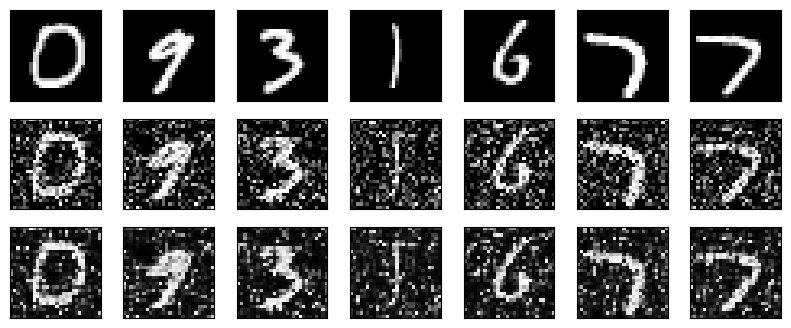

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers,models
import matplotlib.pyplot as plt
from skimage.util import random_noise
from sklearn.model_selection import KFold

(X_train_original, y_train), (X_test_original, _) = tf.keras.datasets.mnist.load_data()
X_train_original, X_test_original = X_train_original / 255.0, X_test_original / 255.0

noise_level = 0.4
X_train_noisy = random_noise(X_train_original, var=noise_level**2)
X_test_noisy = random_noise(X_test_original, var=noise_level**2)

X_train_noisy = np.expand_dims(X_train_noisy, axis=-1)
X_test_noisy = np.expand_dims(X_test_noisy, axis=-1)
X_train_original = np.expand_dims(X_train_original, axis=-1)
X_test_original = np.expand_dims(X_test_original, axis=-1)
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2), padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.UpSampling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.UpSampling2D((2, 2)))
model.add(layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error')

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, val_index in kf.split(X_train_noisy):
    X_train_fold, X_val_fold = X_train_noisy[train_index], X_train_noisy[val_index]

    model.fit(X_train_fold, X_train_fold, epochs=5, batch_size=128, validation_data=(X_val_fold, X_val_fold))

denoised_images = model.predict(X_test_noisy)

n = 7
indices_to_display = [10, 20, 30, 40, 50, 60, 70]

plt.figure(figsize=(10, 4))

for i, idx in enumerate(indices_to_display):
    # original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(tf.squeeze(X_test_original[idx]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # noisy
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(tf.squeeze(X_test_noisy[idx]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # denoised
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(tf.squeeze(denoised_images[idx]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()